Необходимые установки

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.7.0/ru_core_news_sm-3.7.0-py3-none-any.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 996.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.2/920.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


Необходимые библиотеки

In [ ]:
import re
import nltk
import string
import spacy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from copy import deepcopy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from tqdm.auto import tqdm
from scipy.sparse import hstack

Необходимые загрузки

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **0. Подготовка данных**

In [ ]:
ellipsis_corpus = pd.read_csv('/content/ellipsis corpus.csv')

In [ ]:
ellipsis_corpus['label'] = 1
ellipsis_corpus

,sentence,suggested ellipsis resolution,ellipsis type,source,label
0,Работа с двухбайтовыми наборами символов — про...,состоит,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
1,"Выворачивает наизнанку, запад превращает в юг,...",превращает,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
2,Текущие обязательства компании в 2009 г. сокра...,уменьшилась,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
3,Первая конвенция была ратифицирована 80 процен...,была ратифицирована,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
4,"Но Христианин сказал Упрямому: — Нет, сосед, л...",мы получим,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
...,...,...,...,...,...
621,Что упало со стола? – Тарелка __.,упала со стола,answer ellipsis,original,1
622,Кто принёс эти документы? – Секретарь директор...,принёс эти документы,answer ellipsis,original,1
623,Когда откроют новый магазин? – В следующем мес...,откроют новый магазин,answer ellipsis,original,1
624,Что подарят директору на юбилей? __ Красивый е...,директору на юбилей подарят,answer ellipsis,original,1


In [ ]:
normal_corpus = deepcopy(ellipsis_corpus)
normal_corpus

,sentence,suggested ellipsis resolution,ellipsis type,source,label
0,Работа с двухбайтовыми наборами символов — про...,состоит,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
1,"Выворачивает наизнанку, запад превращает в юг,...",превращает,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
2,Текущие обязательства компании в 2009 г. сокра...,уменьшилась,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
3,Первая конвенция была ратифицирована 80 процен...,была ратифицирована,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
4,"Но Христианин сказал Упрямому: — Нет, сосед, л...",мы получим,gapping,https://github.com/dialogue-evaluation/AGRR-2019,1
...,...,...,...,...,...
621,Что упало со стола? – Тарелка __.,упала со стола,answer ellipsis,original,1
622,Кто принёс эти документы? – Секретарь директор...,принёс эти документы,answer ellipsis,original,1
623,Когда откроют новый магазин? – В следующем мес...,откроют новый магазин,answer ellipsis,original,1
624,Что подарят директору на юбилей? __ Красивый е...,директору на юбилей подарят,answer ellipsis,original,1


Заменяем __ в колонке 'sentence' на значение из 'suggested_ellipsis_resolution'


In [ ]:
class EllipsisResolutionError(Exception):
    """Исключение для случаев, когда количество пропусков не совпадает с количеством разрешений"""
    pass

In [ ]:
# Функция для замены __ на соответствующие значения
def replace_ellipsis(row):
    sentence = row['sentence']
    resolution = row['suggested ellipsis resolution']

    count_ellipsis = sentence.count('__')

    try:
        if count_ellipsis == 0:
            return sentence

        if count_ellipsis == 1:
            return sentence.replace('__', resolution)

        # Для нескольких пропусков
        resolutions = [r.strip() for r in resolution.split(',')]

        if len(resolutions) != count_ellipsis:
            raise EllipsisResolutionError(
                f"Количество пропусков ({count_ellipsis}) не совпадает с "
                f"количеством разрешений ({len(resolutions)}) в строке: '{sentence}' эллипис: '{resolution}'"
            )

        parts = sentence.split('__')
        new_sentence = parts[0]
        for i in range(count_ellipsis):
            new_sentence += resolutions[i] + parts[i+1]
        return new_sentence

    except EllipsisResolutionError as e:
        print(f"Ошибка: {e}")
        return sentence

In [ ]:
try:
    normal_corpus['sentence'] = normal_corpus.apply(replace_ellipsis, axis=1)
except Exception as e:
    print(f"Произошла непредвиденная ошибка: {e}")

Ошибка: Количество пропусков (2) не совпадает с количеством разрешений (1) в строке: 'Объем промышленной продукции по сравнению с I полугодием 2003г. увеличился на 7,4%, __ строительства __ на 14,2%.' эллипис: 'объем увеличился'
Ошибка: Количество пропусков (2) не совпадает с количеством разрешений (1) в строке: 'Граница Финландии с Россией длинная, __ с Норвегией короткая, а __ со Швецией - средняя.' эллипис: 'граница'
Ошибка: Количество пропусков (2) не совпадает с количеством разрешений (1) в строке: 'Любопытно было бы узнать, выводил ли Ходорковский деньги за границу на протяжении 90-х — и если да, то в каких количествах __, и если нет, то почему __.' эллипис: 'выводил Ходорковский деньги за границу на протяжении 90-х'
Ошибка: Количество пропусков (3) не совпадает с количеством разрешений (2) в строке: 'Ты поговорил и с Васей, и с Петей?
C Васей да __, а с Петей __ нет __.' эллипис: 'поговорил, я не поговорил'
Ошибка: Количество пропусков (2) не совпадает с количеством разрешений (

In [ ]:
fix_dict = {'Объем промышленной продукции по сравнению с I полугодием 2003г. увеличился на 7,4%, __ строительства __ на 14,2%.': 'Объем промышленной продукции по сравнению с I полугодием 2003г. увеличился на 7,4%, объем строительства увеличился на 14,2%.',
            'Граница Финландии с Россией длинная, __ с Норвегией короткая, а __ со Швецией - средняя.': 'Граница Финландии с Россией длинная, граница с Норвегией короткая, а граница со Швецией - средняя.',
            'Любопытно было бы узнать, выводил ли Ходорковский деньги за границу на протяжении 90-х — и если да, то в каких количествах __, и если нет, то почему __.': 'Любопытно было бы узнать, выводил ли Ходорковский деньги за границу на протяжении 90-х — и если да, то в каких количествах выводил Ходорковский деньги за границу на протяжении 90-х, и если нет, то почему выводил Ходорковский деньги за границу на протяжении 90-х.',
            'Ты поговорил и с Васей, и с Петей?\nC Васей да __, а с Петей __ нет __.': 'Ты поговорил и с Васей, и с Петей?\nC Васей да поговорил, а с Петей не поговорил.',
            'Он все знал про… про нас с… ну, ты понимаешь… Как ты думаешь, откуда он знал? — она впилась в меня напряженным взглядом. Ты ведь им не говорил?  Нет __, — я покачал головой. Конечно, нет __.': 'Он все знал про… про нас с… ну, ты понимаешь… Как ты думаешь, откуда он знал? — она впилась в меня напряженным взглядом. Ты ведь им не говорил?  Нет не говорил, — я покачал головой. Конечно, не говорил.'}

In [ ]:
normal_corpus['sentence'] = normal_corpus['sentence'].replace(fix_dict)

In [ ]:
try:
    normal_corpus['sentence'] = normal_corpus.apply(replace_ellipsis, axis=1)
except Exception as e:
    print(f"Произошла непредвиденная ошибка: {e}")

In [ ]:
normal_corpus

,sentence,suggested ellipsis resolution,ellipsis type,source,label
0,Работа с двухбайтовыми наборами символов — про...,состоит,gapping,https://github.com/dialogue-evaluation/AGRR-2019,0
1,"Выворачивает наизнанку, запад превращает в юг,...",превращает,gapping,https://github.com/dialogue-evaluation/AGRR-2019,0
2,Текущие обязательства компании в 2009 г. сокра...,уменьшилась,gapping,https://github.com/dialogue-evaluation/AGRR-2019,0
3,Первая конвенция была ратифицирована 80 процен...,была ратифицирована,gapping,https://github.com/dialogue-evaluation/AGRR-2019,0
4,"Но Христианин сказал Упрямому: — Нет, сосед, л...",мы получим,gapping,https://github.com/dialogue-evaluation/AGRR-2019,0
...,...,...,...,...,...
621,Что упало со стола? – Тарелка упала со стола.,упала со стола,answer ellipsis,original,0
622,Кто принёс эти документы? – Секретарь директор...,принёс эти документы,answer ellipsis,original,0
623,Когда откроют новый магазин? – В следующем мес...,откроют новый магазин,answer ellipsis,original,0
624,Что подарят директору на юбилей? директору на ...,директору на юбилей подарят,answer ellipsis,original,0


In [ ]:
normal_corpus['label'] = 0

Из предложений с эллипсисом нужно убрать __.

In [ ]:
ellipsis_corpus['sentence'] = ellipsis_corpus['sentence'].str.replace('__', '').str.replace('  ', '')

In [ ]:
df = pd.concat([ellipsis_corpus, normal_corpus]).sample(frac=1).reset_index(drop=True) # мы хотим перемешать предложения с эллипсисом и без, чтобы они шли не по порядку
df

,sentence,suggested ellipsis resolution,ellipsis type,source,label
0,"— Ты не против, если я возьму твою ручку?\r\n—...",я не против если ты возьмешь мою ручку,polarity_ellipsis,original,0
1,Петя и Ваня поехали в экспедицию. В экспедиции...,"выполнять, помыл часть своей посуды","VP_ellipsis, VP_ellipsis","Kuznetsova, S. (2024). Interpretation of Prono...",1
2,"Мы тут чертим, как в школе научили .",чертить,VP_ellipsis,original,1
3,"Если Маша сразу заметила себя на фотографии, т...",сразу заметила себя на фотографии,VP_ellipsis,"Kuznetsova, S. (2024). Interpretation of Prono...",0
4,Здравствуйте! А вы читали книгу «Пиранези» Сюз...,книгу «Пиранези» Сюзанны Кларк,NP_ellipsis,original,0
...,...,...,...,...,...
1247,"У меня день рождения в июне, и у моей сестры т...",день рождения в июне,NP_ellipsis,https://github.com/dcavar/thec_rus/blob/main/d...,1
1248,"Спасибо, что вообще пришел. Хотя не совсем пон...",пришел,sluicing,[Алексей Моторов. Преступление доктора Паровоз...,1
1249,"Теперь уж Алеша был почти уверен в этом, сам н...",был почти уверен в этом,sluicing,https://github.com/dcavar/thec_rus/blob/main/d...,1
1250,"Петя и Ваня иногда согласны друг с другом, а и...",критикует себя,VP_ellipsis,"Kuznetsova, S. (2024). Interpretation of Prono...",1


## **1. EDA analysis**

### Описание задачи:
Нам нужно классифицировать предложения на те, что содержат эллипсис (пропуск слов, которые можно восстановить из контекста) и те, что не содержат.

Задача Ellipsis Resolution обычно разделяется на 3 подзадачи:

1. Определение эллипсиса в предложениях как общая
задача бинарной классификации.
2. Определение позиций пропущенных слов
или фраз в предложениях с эллипсисом.
3. Предсказание правильной морфофонологической формы пропущенных слов
в предложениях с эллипсисом. (Cavar et. al., 2024)

Данный проект будет посвящен 1 задаче, а именно классификации предложений с наличием или отсутствием эллипсиса с помощью методов классического машинного обучения, а также попробует сравнить результаты, где это возможно, с исследованием (Cavar et. al., 2024).


### Первоначальный анализ

Общие данные

In [ ]:
print(f"Всего предложений: {len(df)}")
print(f"Распределение классов:\n{df['label'].value_counts()}")

Всего предложений: 1252
Распределение классов:
label
0    626
1    626
Name: count, dtype: int64


Классы (с наличием эллипсиса vs без эллипсиса) сбалансированы.

Проверим баланс типов эллипсиса

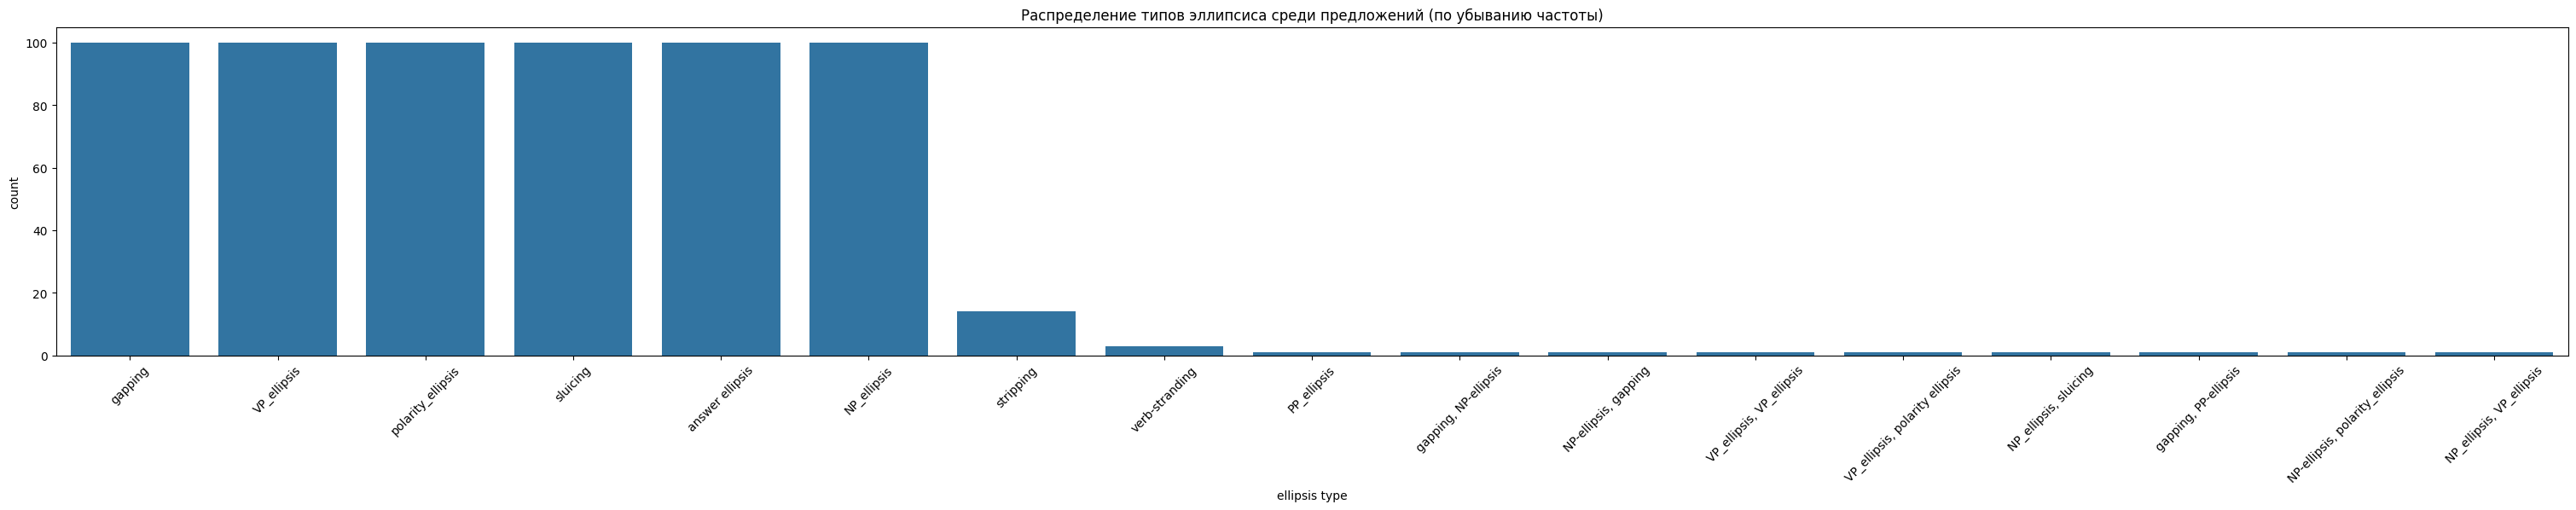

In [ ]:
plt.figure(figsize=(38, 5))
sns.countplot(
    x='ellipsis type',
    data=ellipsis_corpus,
    order=ellipsis_corpus['ellipsis type'].value_counts().index
)
plt.title('Распределение типов эллипсиса среди предложений (по убыванию частоты)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['ellipsis type'].value_counts()

,count
ellipsis type,
polarity_ellipsis,200
VP_ellipsis,200
NP_ellipsis,200
sluicing,200
gapping,200
answer ellipsis,200
stripping,28
verb-stranding,6
"VP_ellipsis, VP_ellipsis",2


Классы с типами polarity_ellipsis, NP_ellipsis, gapping, VP_ellipsis, sluicing и answer ellipsis сбалансированы, имеют наибольшее количество предложений -- 200.

Анализ длины предложений

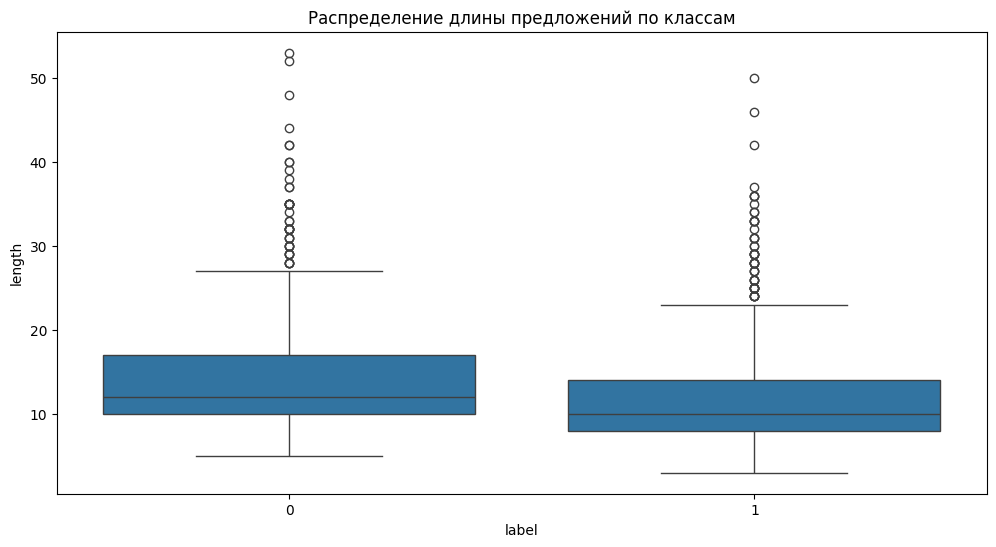

       count       mean       std  min   25%   50%   75%   max
label                                                         
0      626.0  14.479233  7.413742  5.0  10.0  12.0  17.0  53.0
1      626.0  11.955272  6.753813  3.0   8.0  10.0  14.0  50.0


In [ ]:
df['length'] = df['sentence'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='length', data=df)
plt.title('Распределение длины предложений по классам')
plt.show()

print(df.groupby('label')['length'].describe())

Предложения с эллипсисом в среднем немного короче, чем предложения без него.

Анализ наиболее частых слов и паттернов

In [ ]:
# Функция для очистки текста
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

In [ ]:
# Токенизация и подсчет частот
def get_top_words(text, n=20):
    tokens = word_tokenize(clean_text(text))
    tokens = [t for t in tokens if t not in stopwords.words('russian') and t not in string.punctuation]
    return Counter(tokens).most_common(n)

In [ ]:
# Разделим тексты по классам
ellipsis_texts = ' '.join(df[df['label']==1]['sentence'].tolist())
no_ellipsis_texts = ' '.join(df[df['label']==0]['sentence'].tolist())

print("Топ слова в предложениях с эллипсисом:")
print(get_top_words(ellipsis_texts))

print("\nТоп слова в предложениях без эллипсиса:")
print(get_top_words(no_ellipsis_texts))

Топ слова в предложениях с эллипсисом:
[('петя', 47), ('почему', 41), ('маша', 34), ('ваня', 25), ('либо', 25), ('это', 24), ('знаю', 18), ('кому', 17), ('даша', 13), ('купил', 13), ('знает', 12), ('витя', 11), ('ещё', 11), ('сегодня', 10), ('хотя', 10), ('пока', 10), ('хочет', 9), ('сколько', 9), ('хочу', 9), ('любит', 9)]

Топ слова в предложениях без эллипсиса:
[('петя', 49), ('почему', 42), ('маша', 35), ('это', 34), ('либо', 26), ('ваня', 26), ('знаю', 19), ('кому', 17), ('сегодня', 17), ('кино', 17), ('купил', 17), ('своей', 15), ('иван', 15), ('хочу', 15), ('любит', 14), ('машину', 14), ('даша', 13), ('знает', 13), ('играть', 13), ('вчера', 12)]


Разделение на train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['sentence'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

## **2. Бейзлайн**

Возьмем классическую логистическую регрессию, без предобработки и подбора парметров, также выберем векторизатор (между CountVectorizer и TfIdf).

In [ ]:
# Сравним CountVectorizer и TfidfVectorizer с одинаковыми параметрами
vectorizers = {
    'CountVectorizer': CountVectorizer(ngram_range=(1, 4), max_features=5000),
    'TfidfVectorizer': TfidfVectorizer(ngram_range=(1, 4), max_features=5000)
}

# Тестируем на логистической регрессии
results = {}
for name, vectorizer in vectorizers.items():
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ])

    # Кросс-валидация для надежной оценки
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    results[name] = {
        'mean_f1': np.mean(scores),
        'std_f1': np.std(scores)
    }

print("\nСравнение методов векторизации:")
for name, metrics in results.items():
    print(f"{name}: F1 = {metrics['mean_f1']:.3f} ± {metrics['std_f1']:.3f}")

best_vectorizer_name = max(results, key=lambda x: results[x]['mean_f1'])
print(f"\nЛучший векторизатор: {best_vectorizer_name}")

# Создаем base_pipeline с лучшим векторизатором
if best_vectorizer_name == 'CountVectorizer':
    final_vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=3000)
else:
    final_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=3000)

base_pipeline = Pipeline([('vectorizer', final_vectorizer),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])


Сравнение методов векторизации:
CountVectorizer: F1 = 0.515 ± 0.013
TfidfVectorizer: F1 = 0.351 ± 0.021

Лучший векторизатор: CountVectorizer


Logistic Regression:

Принцип работы
Линейный классификатор, предсказывающий вероятность класса через сигмоидную функцию. Оптимизирует log loss с помощью градиентного спуска, добавляя регуляризацию для борьбы с переобучением.

Формула
Вероятность класса 1:

P(y=1|x) = 1 / (1 + exp(-(w·x + b)))  

Функция потерь:

Loss = -Σ [y·log(p) + (1-y)·log(1-p)]  

TfidfVectorizer:

TF (Term Frequency)

Частота термина в документе:

_tf(t,d) = (количество вхождений t в d) / (общее число слов в d)_

IDF (Inverse Document Frequency)

Обратная частота документа. Уменьшает вес слов, встречающихся во многих документах:

_idf(t) = log( (общее число документов) / (число документов с t) ) + 1_

Итоговая формула TF-IDF:

_tfidf(t,d) = tf(t,d) × idf(t)_

In [ ]:
# Функция для оценки моделей
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Без эллипсиса (0)', 'С эллипсисом (1)'],
            yticklabels=['Без эллипсиса (0)', 'С эллипсисом (1)'])
    plt.title('Confusion Matrix')
    plt.ylabel('Фактический класс')
    plt.xlabel('Предсказанный класс')
    plt.show()
    return y_pred, y_proba


Оценка базовой модели:
              precision    recall  f1-score   support

           0       0.43      0.26      0.33       126
           1       0.47      0.66      0.55       125

    accuracy                           0.46       251
   macro avg       0.45      0.46      0.44       251
weighted avg       0.45      0.46      0.44       251

Accuracy: 0.4581673306772908
F1-score: 0.5466666666666666
ROC-AUC: 0.3927936507936508


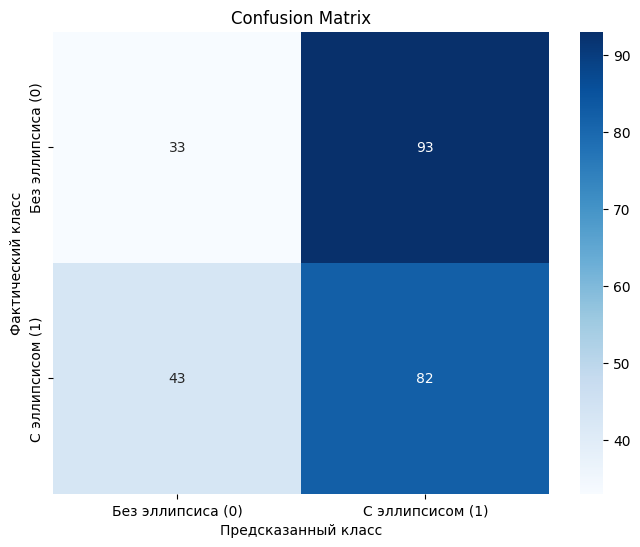

In [ ]:
print("\nОценка базовой модели:")
base_pred, base_proba = evaluate_model(base_pipeline, X_train, X_test, y_train, y_test)

Accuracy: (TP + TN) / (TP + FP + FN + TN)
Доля всех правильных предсказаний

Precision: TP / (TP + FP)
Какая доля предсказанных положительных классов действительно положительна

Recall: TP / (TP + FN)
Какая доля реальных положительных классов была правильно предсказана

F1-score: 2 * (Precision * Recall) / (Precision + Recall)
Гармоническое среднее между Precision и Recall

## **3.1 Улучшение модели**

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
def preprocess_text(text):
    doc = nlp(text)
    # Удаляем пунктуацию, стоп-слова, приводим к нижнему регистру
    tokens = [token.lemma_.lower() for token in doc
              if not token.is_punct and not token.is_stop]
    return " ".join(tokens)

In [ ]:
# Применяем предобработку
X_train_processed = X_train.apply(preprocess_text)
X_test_processed = X_test.apply(preprocess_text)

In [ ]:
# Создаем код для учета дополнительных признаков, которые могут показывать наличие эллипсиса
def create_features(texts):
    features = []
    for text in tqdm(texts):
        doc = nlp(text)
        # Количество знаков препинания (может быть связано с эллипсисом)
        punct_count = sum(1 for token in doc if token.is_punct)
        # Количество дефисов/тире (часто встречаются в эллиптических конструкциях)
        dash_count = text.count('-')
        # Длина предложения в словах
        word_count = len([token for token in doc if not token.is_punct])

        features.append([punct_count, dash_count, word_count])

    return np.array(features)

In [ ]:
# Создаем признаки
train_features = create_features(X_train)
test_features = create_features(X_test)

  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

In [ ]:
# Word2Vec эмбеддинги
sentences = [text.split() for text in X_train_processed]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
def get_w2v_embeddings(texts, model):
    embeddings = []
    for text in texts:
        words = text.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if len(word_vectors) > 0:
            text_vector = np.mean(word_vectors, axis=0)
        else:
            text_vector = np.zeros(model.vector_size)
        embeddings.append(text_vector)
    return np.array(embeddings)

In [ ]:
train_w2v = get_w2v_embeddings(X_train_processed, w2v_model)
test_w2v = get_w2v_embeddings(X_test_processed, w2v_model)

# Текстовые признаки
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=3000)
train_text_features = vectorizer.fit_transform(X_train_processed)
test_text_features = vectorizer.transform(X_test_processed)

# Масштабируем числовые признаки
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Объединяем все признаки
X_train_enhanced = hstack([train_text_features, train_features_scaled, train_w2v])
X_test_enhanced = hstack([test_text_features, test_features_scaled, test_w2v])

## **3.2 Улучшение бейзлайна и подбор моделей**

Результаты логистической регрессии с предобработкой


Оценка улучшенной логистической регрессии:
              precision    recall  f1-score   support

           0       0.54      0.47      0.50       126
           1       0.53      0.60      0.56       125

    accuracy                           0.53       251
   macro avg       0.53      0.53      0.53       251
weighted avg       0.53      0.53      0.53       251

Accuracy: 0.5338645418326693
F1-score: 0.5617977528089888
ROC-AUC: 0.5462539682539683


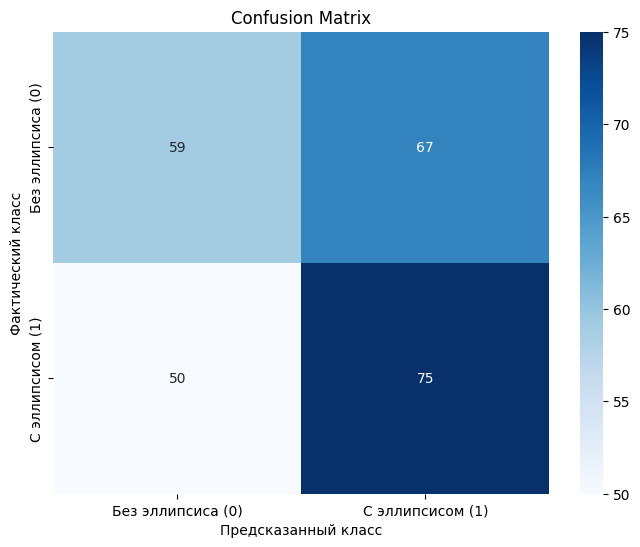

In [ ]:
lr_enhanced = LogisticRegression(random_state=42, max_iter=1000)
lr_enhanced.fit(X_train_enhanced, y_train)

print("\nОценка улучшенной логистической регрессии:")
lr_pred, lr_proba = evaluate_model(lr_enhanced, X_train_enhanced, X_test_enhanced, y_train, y_test)

Стало лучше! Теперь меньше FP.

Попробуем другие модели


Оценка Random Forest:
              precision    recall  f1-score   support

           0       0.31      0.36      0.33       126
           1       0.23      0.19      0.21       125

    accuracy                           0.27       251
   macro avg       0.27      0.27      0.27       251
weighted avg       0.27      0.27      0.27       251

Accuracy: 0.2749003984063745
F1-score: 0.20869565217391303
ROC-AUC: 0.19603174603174603


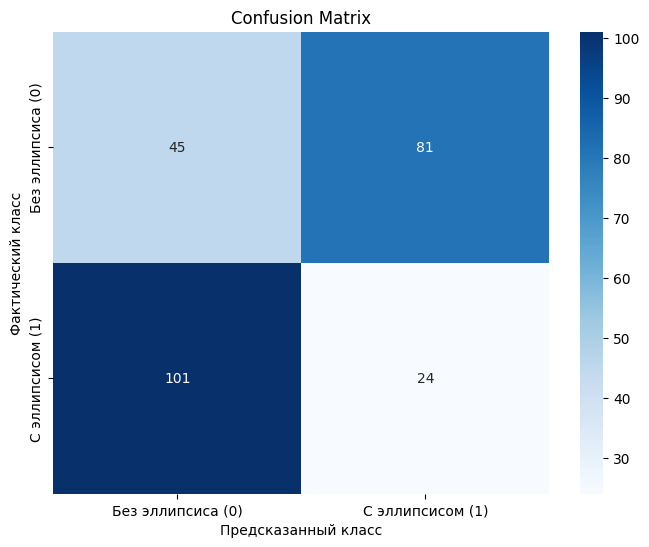

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_enhanced, y_train)
print("\nОценка Random Forest:")
rf_proba = evaluate_model(rf, X_train_enhanced, X_test_enhanced, y_train, y_test)

Сравнивая Random Forest и Логистическую регрессию до подбора threshold, логистическая регрессия и SVM показывают лучший результат.


Оценка SVM:
              precision    recall  f1-score   support

           0       0.21      0.04      0.07       126
           1       0.47      0.85      0.60       125

    accuracy                           0.44       251
   macro avg       0.34      0.44      0.33       251
weighted avg       0.34      0.44      0.33       251

Accuracy: 0.44223107569721115
F1-score: 0.6022727272727273
ROC-AUC: 0.49933333333333324


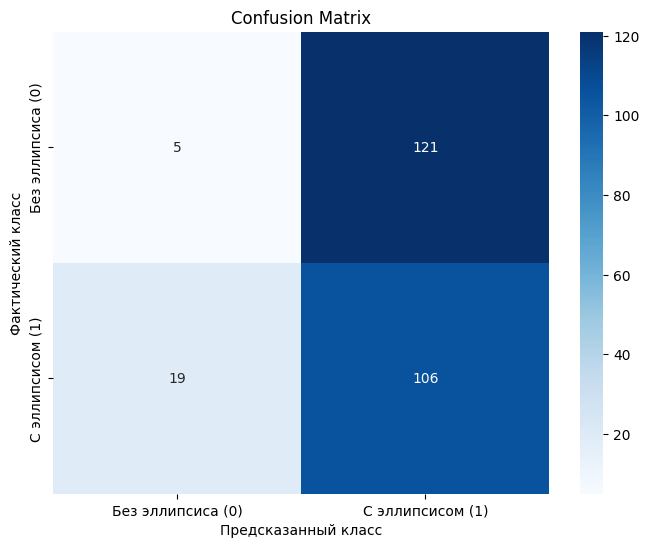

In [ ]:
# SVM
svm = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),  # для sparse матриц
    ('svc', SVC(probability=True, random_state=42))
])
svm.fit(X_train_enhanced, y_train)
print("\nОценка SVM:")
svm_proba = evaluate_model(svm, X_train_enhanced, X_test_enhanced, y_train, y_test)

Сравнивая SVM и Логистическую регрессию до подбора threshold, логистическая регрессия все еще показывает лучший результат.

Подберем гиперпараметры для логистической регрессии.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
330 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv


Лучшие параметры: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

Оценка лучшей логистической регрессии:
              precision    recall  f1-score   support

           0       0.62      0.52      0.56       126
           1       0.58      0.68      0.63       125

    accuracy                           0.60       251
   macro avg       0.60      0.60      0.60       251
weighted avg       0.60      0.60      0.59       251

Accuracy: 0.5976095617529881
F1-score: 0.6273062730627307
ROC-AUC: 0.6716825396825397


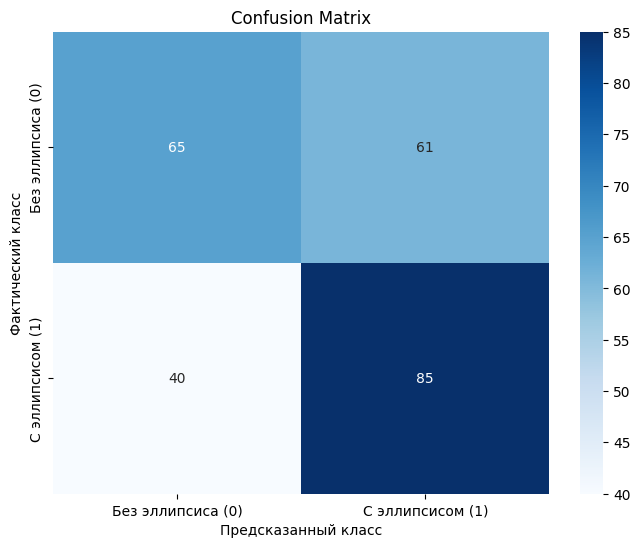

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid, cv=5, scoring='f1', n_jobs=-1
)
grid_search.fit(X_train_enhanced, y_train)

print("\nЛучшие параметры:", grid_search.best_params_)
best_lr = grid_search.best_estimator_
print("\nОценка лучшей логистической регрессии:")
best_lr_proba = evaluate_model(best_lr, X_train_enhanced, X_test_enhanced, y_train, y_test)

Подбор threshold для логистической регрессии


Оценка улучшенной логистической регрессии:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       126
           1       0.68      0.68      0.68       125

    accuracy                           0.68       251
   macro avg       0.68      0.68      0.68       251
weighted avg       0.68      0.68      0.68       251

Accuracy: 0.6812749003984063
F1-score: 0.68
ROC-AUC: 0.696984126984127


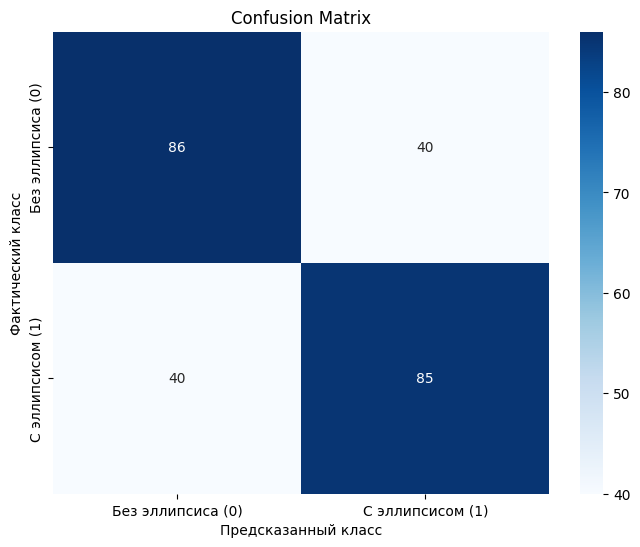

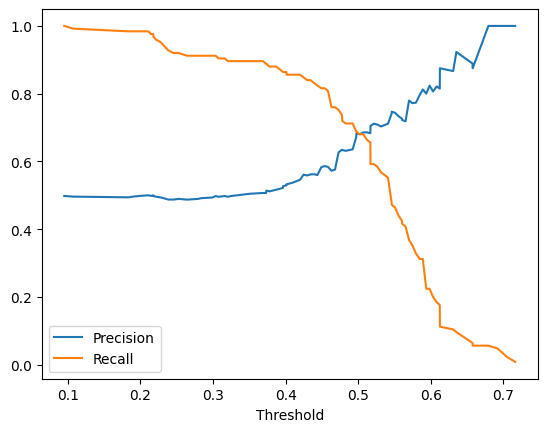

Лучший threshold: 0.50


In [ ]:
lr_enhanced2 = LogisticRegression(random_state=42, max_iter=1000, C=0.1, penalty='l1', solver='liblinear')
lr_enhanced2.fit(X_train_enhanced, y_train)

print("\nОценка улучшенной логистической регрессии:")
lr_pred, lr_proba = evaluate_model(lr_enhanced2, X_train_enhanced, X_test_enhanced, y_train, y_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, lr_proba)
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

# Выбираем threshold по F1-score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Лучший threshold: {best_threshold:.2f}")

In [ ]:
# Функция для оценки моделей
def evaluate_model2(model, X_train, X_test, y_train, y_test, threshold):
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_test)[:,1]
    y_pred = (probs >= threshold).astype(int)

    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, probs))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Без эллипсиса (0)', 'С эллипсисом (1)'],
            yticklabels=['Без эллипсиса (0)', 'С эллипсисом (1)'])
    plt.title('Confusion Matrix')
    plt.ylabel('Фактический класс')
    plt.xlabel('Предсказанный класс')
    plt.show()
    return y_pred


Оценка улучшенной логистической регрессии:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       126
           1       0.68      0.69      0.69       125

    accuracy                           0.69       251
   macro avg       0.69      0.69      0.69       251
weighted avg       0.69      0.69      0.69       251

Accuracy: 0.6852589641434262
F1-score: 0.6852589641434262
ROC-AUC: 0.696984126984127


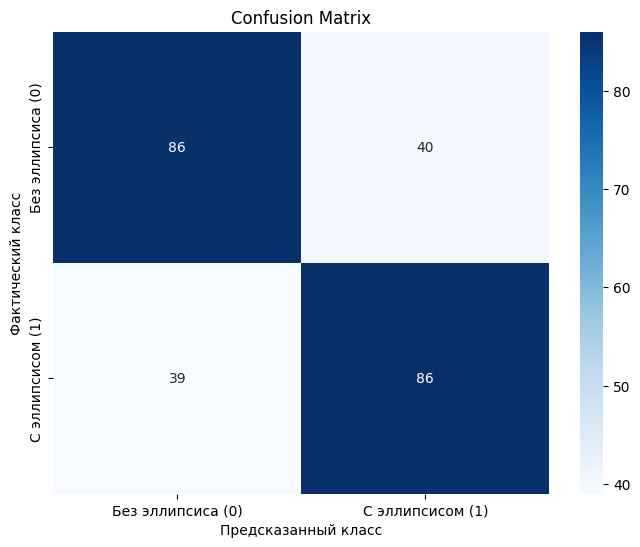

In [ ]:
print("\nОценка улучшенной логистической регрессии:")
lr_pred2 = evaluate_model2(lr_enhanced2, X_train_enhanced, X_test_enhanced, y_train, y_test, best_threshold)

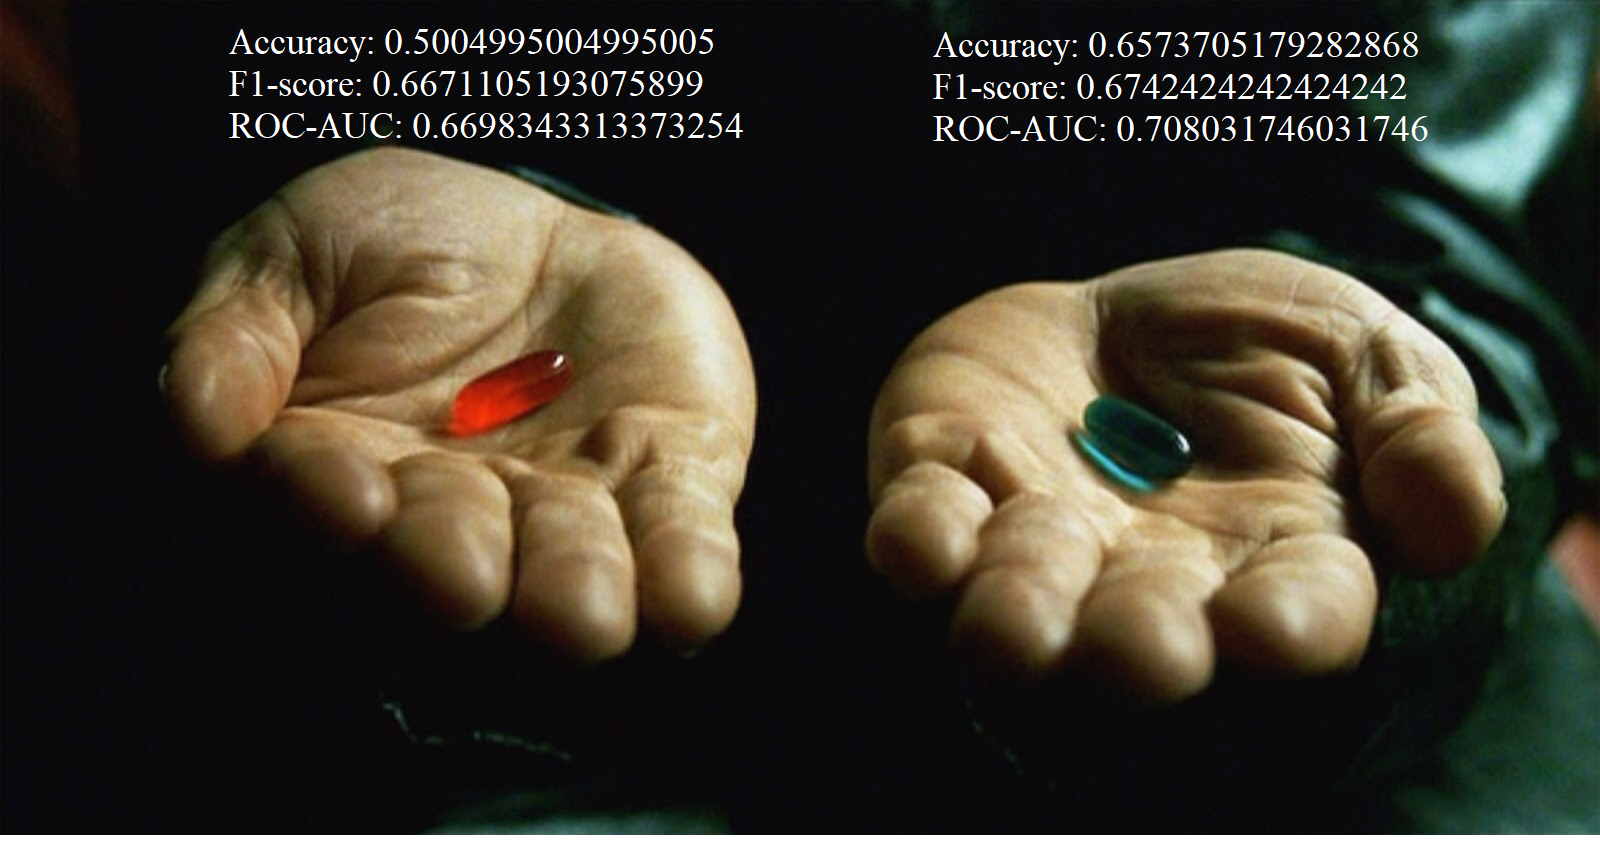

На картинке сверху показана разница между результатами модели, если сначала подбирать порог, а потом гиперпараметры (что делать не стоит, это была первая версия -- на картинке результаты одних из первых попыток), и наоборот.

Пока мы добились лучших результатов с помощью логистической регрессии: f1-score = 0.69

Попробуем SVM?

Подбираем лучшие параметры для SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Лучшие параметры: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Оптимальный threshold: 0.442

Оценка с оптимальным threshold:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       126
           1       0.50      1.00      0.67       125

    accuracy                           0.50       251
   macro avg       0.75      0.50      0.34       251
weighted avg       0.75      0.50      0.34       251

Accuracy: 0.50199203187251
F1-score: 0.6666666666666666
ROC-AUC: 0.5049206349206349


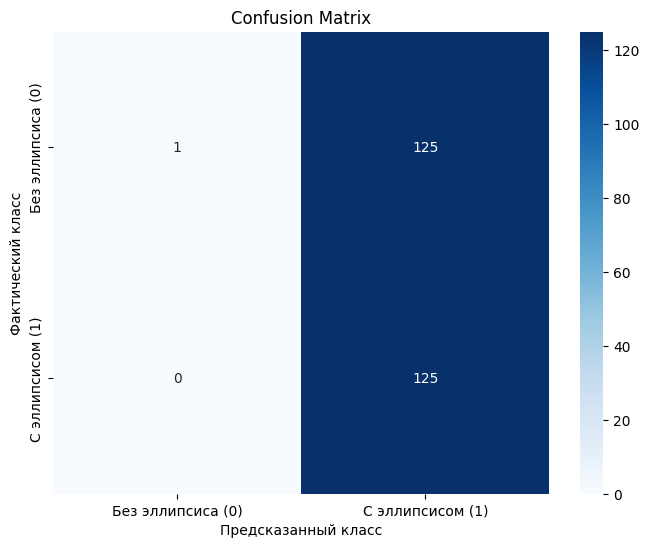

In [ ]:
# с CountVectorizer
def optimize_svm_simple(X_train, X_test, y_train, y_test):
    # 1. Простой пайплайн без классов
    pipeline = Pipeline([
        ('tfidf', CountVectorizer(ngram_range=(1, 4), max_features=5000)),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm', SVC(probability=True, random_state=42))
    ])

    # 2. Сетка параметров для SVM
    param_grid = {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'],
        'svm__gamma': ['scale', 'auto']
    }

    # 3. Подбор параметров
    print("Подбираем лучшие параметры для SVM...")
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # 4. Лучшая модель
    best_svm = grid_search.best_estimator_
    print(f"\nЛучшие параметры: {grid_search.best_params_}")

    # 5. Подбор threshold
    y_proba = best_svm.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Оптимальный threshold: {best_threshold:.3f}")

    # 6. Функция для предсказания с threshold
    def svm_predict(model, X, threshold=0.5):
        return (model.predict_proba(X)[:, 1] >= threshold).astype(int)

    # 7. Оценка с оптимальным threshold
    print("\nОценка с оптимальным threshold:")
    y_pred = evaluate_model2(best_svm, X_train, X_test, y_train, y_test, threshold=best_threshold)

    return best_svm, best_threshold

best_svm_model, optimal_svm_threshold = optimize_svm_simple(X_train, X_test, y_train, y_test)

Подбираем лучшие параметры для SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Лучшие параметры: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Оптимальный threshold: 0.469

Оценка с оптимальным threshold:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       126
           1       0.74      0.82      0.78       125

    accuracy                           0.76       251
   macro avg       0.77      0.77      0.76       251
weighted avg       0.77      0.76      0.76       251

Accuracy: 0.7649402390438247
F1-score: 0.7756653992395437
ROC-AUC: 0.8077142857142857


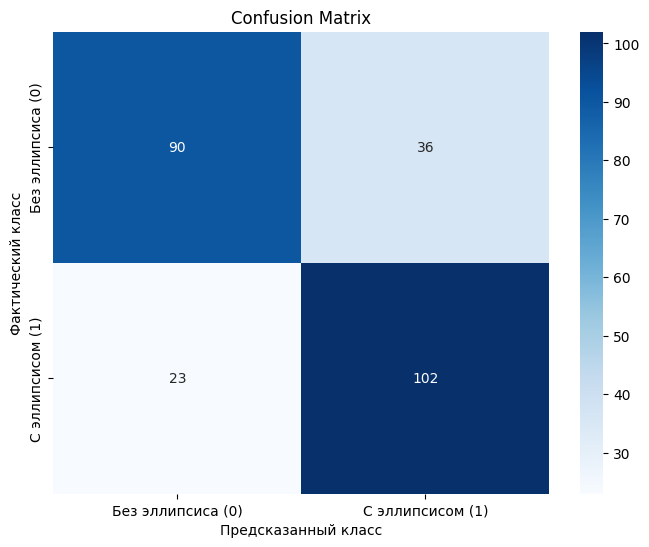

In [ ]:
# с TfIdf
def optimize_svm_simple(X_train, X_test, y_train, y_test):
    # 1. Простой пайплайн без классов
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 4), max_features=5000)),
        ('scaler', StandardScaler(with_mean=False)),
        ('svm', SVC(probability=True, random_state=42))
    ])

    # 2. Сетка параметров для SVM
    param_grid = {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['linear', 'rbf'],
        'svm__gamma': ['scale', 'auto']
    }

    # 3. Подбор параметров
    print("Подбираем лучшие параметры для SVM...")
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # 4. Лучшая модель
    best_svm = grid_search.best_estimator_
    print(f"\nЛучшие параметры: {grid_search.best_params_}")

    # 5. Подбор threshold
    y_proba = best_svm.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Оптимальный threshold: {best_threshold:.3f}")

    # 6. Функция для предсказания с threshold
    def svm_predict(model, X, threshold=0.5):
        return (model.predict_proba(X)[:, 1] >= threshold).astype(int)

    # 7. Оценка с оптимальным threshold
    print("\nОценка с оптимальным threshold:")
    y_pred = evaluate_model2(best_svm, X_train, X_test, y_train, y_test, threshold=best_threshold)

    return best_svm, best_threshold

best_svm_model2, optimal_svm_threshold2 = optimize_svm_simple(X_train, X_test, y_train, y_test)

In [ ]:
# Текстовые признаки
vectorizer2 =  TfidfVectorizer(ngram_range=(1,4), max_features=3000)
train_text_features2 = vectorizer.fit_transform(X_train_processed)
test_text_features2 = vectorizer.transform(X_test_processed)

# Масштабируем числовые признаки
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Объединяем все признаки
X_train_enhanced2 = hstack([train_text_features2, train_features_scaled, train_w2v])
X_test_enhanced2 = hstack([test_text_features2, test_features_scaled, test_w2v])

Подбираем лучшие параметры для SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Лучшие параметры: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Оптимальный threshold: 0.187

Оценка с оптимальным threshold:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       126
           1       0.50      1.00      0.67       125

    accuracy                           0.50       251
   macro avg       0.75      0.50      0.34       251
weighted avg       0.75      0.50      0.34       251

Accuracy: 0.50199203187251
F1-score: 0.6666666666666666
ROC-AUC: 0.6543174603174604


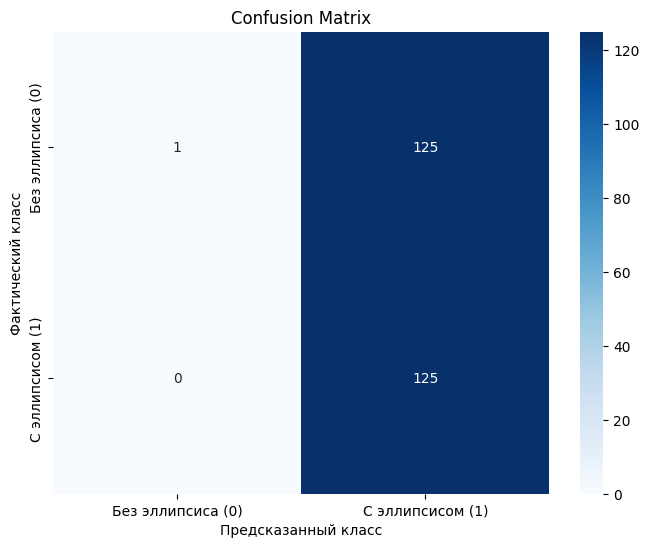

In [ ]:
# с TfIdf и enhansed data
def optimize_svm_simple2(X_train, X_test, y_train, y_test):
    # 1. Сетка параметров для SVM
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    # 2. Подбор параметров
    print("Подбираем лучшие параметры для SVM...")
    grid_search = GridSearchCV(
        SVC(probability=True, random_state=42),
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train)

    # 3. Лучшая модель
    best_svm = grid_search.best_estimator_
    print(f"\nЛучшие параметры: {grid_search.best_params_}")

    # 4. Подбор threshold
    y_proba = best_svm.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Оптимальный threshold: {best_threshold:.3f}")

    # 5. Функция для предсказания с threshold
    def svm_predict(model, X, threshold=0.5):
        return (model.predict_proba(X)[:, 1] >= threshold).astype(int)

    # 6. Оценка с оптимальным threshold
    print("\nОценка с оптимальным threshold:")
    y_pred = evaluate_model2(best_svm, X_train, X_test, y_train, y_test, threshold=best_threshold)

    return best_svm, best_threshold

best_svm_model3, optimal_svm_threshold3 = optimize_svm_simple2(X_train_enhanced2, X_test_enhanced2, y_train, y_test)

## **3.3 Оценка моделей и интерпретация**


Сравнение моделей:
                           Model  Accuracy        F1   ROC-AUC
6                 Optimized SVM2  0.764940  0.775665  0.765143
2  Optimized Logistic Regression  0.685259  0.685259  0.685270
5                 Optimized SVM1  0.501992  0.666667  0.503968
7                 Optimized SVM3  0.501992  0.666667  0.500000
4                            SVM  0.442231  0.602273  0.499333
1   Enhanced Logistic Regression  0.533865  0.561798  0.546254
0       Base Logistic Regression  0.458167  0.546667  0.392794
3                  Random Forest  0.274900  0.208696  0.196032


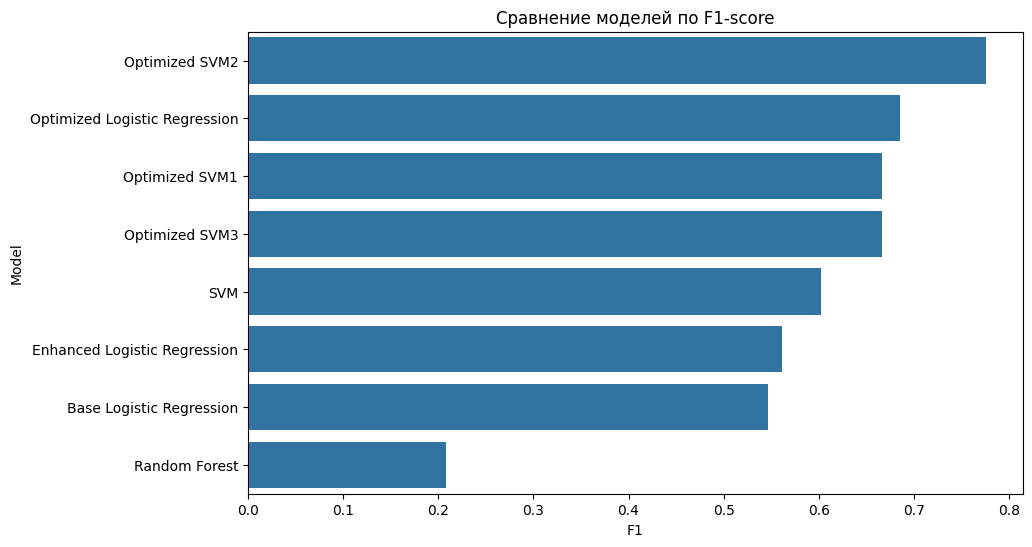


Хорошие примеры:
Петя постоянно сравнивает себя с другими людьми, и Ваня тоже . true_label 1 predicted_label 1
В эконом-классе днем посадка будет стоить 65 рублей, каждая минута — будет стоить 12 рублей; после 21:00 тариф на посадку повышается до 90 рублей, а каждая минута пути обойдется в 15 рублей. true_label 0 predicted_label 0
— Они придут завтра?
— Наверное, да . true_label 1 predicted_label 1
Я хочу поехать за границу, но не знаю куда . true_label 1 predicted_label 1
Преподаватель забыл почту одного из студентов. Маша напомнила свою почту, и Даша тоже напомнила свою почту. true_label 0 predicted_label 0

Плохие примеры:
Андрей заходил в HR-отдел или Виктор заходил в HR-отдел? true_label 0 predicted_label 1
Петя сегодня отработал в офисе пять часов, а Витя восемь часов. true_label 0 predicted_label 1
Когда Машу взяли на работу? Машу взяли на работу В прошлом месяце. true_label 0 predicted_label 1
Потому что Ты научил меня тому, что прощение является высшим уровнем прочности, а ме

In [ ]:
# Сравнение моделей
models = {
    'Base Logistic Regression': base_pipeline,
    'Enhanced Logistic Regression': lr_enhanced,
    'Optimized Logistic Regression': lr_enhanced2,
    'Random Forest': rf,
    'SVM': svm,
    'Optimized SVM1': best_svm_model,
    'Optimized SVM2': best_svm_model2,
    'Optimized SVM3': best_svm_model3,
}

results = []
for name, model in models.items():
    if name == 'Base Logistic Regression':
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]
    elif name == 'Optimized SVM1':
        y_pred = (model.predict_proba(X_test)[:,1] >= optimal_svm_threshold).astype(int)
        y_proba = model.predict_proba(X_test)[:,1] >= optimal_svm_threshold
    elif name == 'Optimized SVM2':
        y_pred = (model.predict_proba(X_test)[:,1] >= optimal_svm_threshold2).astype(int)
        y_proba = model.predict_proba(X_test)[:,1] >= optimal_svm_threshold2
    elif name == 'Optimized SVM3':
        y_pred = (model.predict_proba(X_test_enhanced)[:,1] >= optimal_svm_threshold3).astype(int)
        y_proba = model.predict_proba(X_test_enhanced)[:,1] >= optimal_svm_threshold3.astype(int)
    elif name == 'Optimized Logistic Regression':
        y_pred = (model.predict_proba(X_test_enhanced)[:,1] >= best_threshold).astype(int)
        y_proba = model.predict_proba(X_test_enhanced)[:,1] >= best_threshold
    else:
        y_pred = model.predict(X_test_enhanced)
        y_proba = model.predict_proba(X_test_enhanced)[:,1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results).sort_values('F1', ascending=False)
print("\nСравнение моделей:")
print(results_df)

# Визуализация
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='F1', y='Model')
plt.title('Сравнение моделей по F1-score')
plt.show()

# Интерпретация лучшей модели
# Примеры работы модели
test_data = pd.DataFrame({
    'text': X_test,
    'true_label': y_test,
    'predicted_prob': best_lr.predict_proba(X_test_enhanced)[:,1],
    'predicted_label': best_lr.predict(X_test_enhanced)
})

print("\nХорошие примеры:")
good_examples = test_data[test_data['true_label'] == test_data['predicted_label']].sample(5)
for i in range(len(good_examples)):
  print(good_examples['text'].tolist()[i], 'true_label', good_examples['true_label'].tolist()[i], 'predicted_label', good_examples['predicted_label'].tolist()[i])

print("\nПлохие примеры:")
bad_examples = test_data[test_data['true_label'] != test_data['predicted_label']].sample(5)
for i in range(len(bad_examples)):
  print(bad_examples['text'].tolist()[i], 'true_label', bad_examples['true_label'].tolist()[i], 'predicted_label', bad_examples['predicted_label'].tolist()[i])

## **4. Результаты**

В (Cavar et. al., 2024) задача бинарной классификации выполнялась с помощью логистической регрессии, в таблице представлены результаты для английского языка:

| model | accuracy |
|-------|----------|
| LR    | 0.74     |

Однако (Cavar et. al., 2024) утверждают, что результаты для русского языка отличаются несущественно, поэтому мы будем ориентироваться на эти данные.

В нашем случае, к сожалению, логистическая регрессия показала более низкие результаты, даже с учетом подбора гиперпараметров и threshold:

| Model                         | Accuracy   | F1       | ROC-AUC  |
|-------------------------------|------------|----------|----------|
| Optimized Logistic Regression |   0.685259 | 0.685259 | 0.685270 |

Однако, бинарная классификация с помощью SVM классификатора показала более высокие результаты, по сравнению с (Cavar et. al., 2024):

| Model          | Accuracy   | F1         | ROC-AUC  |
|----------------|------------|------------|----------|
| Optimized SVM2 |   0.764940 |   0.775665 | 0.765143 |

Accuracy 0.76 удалось добиться с помощью следующего пайплайна SVM:

1. Лучшие параметры: {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}

2. Оптимальный threshold: 0.469

3. Без предобработки текстовых данных

References

Damir Cavar, Ludovic Mompelat, and Muhammad Abdo. 2024. The Typology of Ellipsis: A Corpus for Linguistic Analysis and Machine Learning Applications. In Proceedings of the 6th Workshop on Research in Computational Linguistic Typology and Multilingual NLP, pages 46–54, St. Julian's, Malta. Association for Computational Linguistics.